In [33]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

import numpy as np
from numpy import linalg as LA
from numpy.linalg import inv, lstsq

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, scale, RobustScaler
from sklearn import preprocessing
from sklearn import cross_validation, metrics 
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.grid_search import GridSearchCV   #Perforing grid search

from math import sqrt
from sklearn.metrics import mean_squared_error

from xgboost import plot_importance
from matplotlib import pyplot

import seaborn as sns
from datetime import datetime

import scipy
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats.mstats import winsorize

from random import *
from xgboost import XGBClassifier

import xgboost as xgb

In [35]:
movies_df = pd.read_csv('data/final.csv')
movies_df = movies_df.drop(['adult'], 1)
movies_df = movies_df.drop(['Unnamed: 0'], 1)
movies_df = movies_df.drop(['id'], 1)

movies_df

,budget,revenue,runtime,views,likes,dislikes,n_trailers,daysSinceStart,dayInYear,Mystery,...,es,fr,hi,it,ja,ko,ml,ru,ta,zh
0,30000000,3.735540e+08,81.0,8050136,6330,1965,3,29484,302,0,...,0,0,0,0,0,0,0,0,0,0
1,65000000,2.627972e+08,104.0,83048,70,14,1,29530,348,0,...,0,0,0,0,0,0,0,0,0,0
2,16000000,8.145216e+07,127.0,104948,0,0,1,29537,355,0,...,0,0,0,0,0,0,0,0,0,0
3,60000000,1.874368e+08,170.0,32419,119,1,1,29530,348,0,...,0,0,0,0,0,0,0,0,0,0
4,35000000,6.435017e+07,106.0,6162,12,3,2,29537,355,0,...,0,0,0,0,0,0,0,0,0,0
5,58000000,3.521940e+08,130.0,60593,138,9,4,29501,319,0,...,0,0,0,0,0,0,0,0,0,0
6,62000000,1.078795e+08,106.0,2728,3,0,1,29502,320,0,...,0,0,0,0,0,0,0,0,0,0
7,44000000,1.368176e+07,192.0,199605,399,16,1,29537,355,0,...,0,0,0,0,0,0,0,0,0,0
8,98000000,1.001732e+07,119.0,340713,353,24,1,29537,355,0,...,0,0,0,0,0,0,0,0,0,0
9,52000000,1.161124e+08,178.0,964716,1788,61,1,29507,325,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
revenue = movies_df['revenue']
complete_x = movies_df.drop(['revenue'], 1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(complete_x, revenue, test_size=0.33, random_state=42)

In [50]:
max_depth = 3
min_child_weight = 10
subsample = 0.5
colsample_bytree = 0.6
objective = 'reg:linear'
num_estimators = 60
learning_rate = 0.3
eval_metric = 'rmse'

clf = xgb.XGBRegressor(max_depth=max_depth,
                min_child_weight=min_child_weight,
                subsample=subsample,
                colsample_bytree=colsample_bytree,
                objective=objective,
                n_estimators=num_estimators,
                learning_rate=learning_rate,
                eval_metric = eval_metric)
clf.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, eval_metric='rmse', gamma=0,
       learning_rate=0.3, max_delta_step=0, max_depth=3,
       min_child_weight=10, missing=None, n_estimators=60, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.5)

In [51]:
y_predicted = clf.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_predicted))
rmse

104603781.81224936

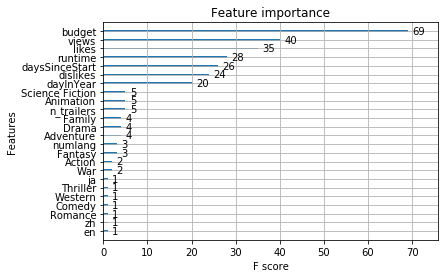

In [52]:
# plot feature importance
plot_importance(clf)
pyplot.show()

In [55]:
profit = []
for i in range(len(movies_df)):
    profit.append(movies_df['revenue'][i] - movies_df['budget'][i])

In [58]:
movies_df['profit'] = profit
len(movies_df[movies_df['profit'] < 0])


1415

In [59]:
isProfitable = []
for i in range(len(movies_df)):
    isProfitable.append(movies_df['profit'][i] > 0)
movies_df['isProfitable'] = isProfitable

In [63]:
X = movies_df.drop(['revenue', 'profit', 'isProfitable'], axis=1)
y = movies_df.isProfitable.astype('int')

In [65]:
X_train, X_test, y_train, y_test = train_test_split(complete_x, revenue, test_size=0.25, random_state=42)

In [66]:
clf = XGBClassifier()

In [ ]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)